In [1]:
import numpy as np
import sys
sys.path.append('../../')
sys.path.append('../../pyfos/')
from pyfos.models.feedforward import build_feedforward
from pyfos.generic.optimizer import gd_optimizer
from pyfos.generic.regularizers import gaus_prior
from functools import partial 
from pyfos.tc.simple import  simple_tc
from pyfos.tc.cv import  cv_tc
from pyfos.hyperoptimizers.random_search import random_optimize
from pyfos.hyperoptimizers.greed_optimize import greed_optimize
import theano
%matplotlib inline
import matplotlib.pylab as plt
import random

In [2]:
matrix = np.load('../../../data/matrix.npy')
X, Y = np.load('../../../data/linearx.npy'), np.load('../../../data/lineary.npy')
X_train = X[:100]
Y_train = Y[:100]
X_test = X[100:]
Y_test = Y[100:]
lr = theano.shared(10**(-3))
alphas = theano.shared(np.array([1.0, 1.0]))

optimizer = partial(gd_optimizer, learning_rate=lr)
model_build = partial(build_feedforward, structure = [2,1], nonlinearity=lambda x:x, log_alphas=alphas, bias=False)




In [6]:
hyp_lr_range = [7.5, 0.0] 
print 'calbirate: alpha'
found = False
for h in [  [np.array([np.log(np.sqrt(10**(-0))), np.log(np.sqrt(10**(-0)))]), 10**(-2)],
             [np.array([np.log(np.sqrt(10**9)), np.log(np.sqrt(10**9))]), 10**(-2)]]:
    
    print h
    while True:

            
            lr.set_value(h[1])
            alphas.set_value(h[0])



            score = greed_optimize(partial(cv_tc, k =4,  batch_size=75), model_build, optimizer,10, 75,  10,  X_train, Y_train,  [alphas, lr] , 
                   lr=hyp_lr_range, verbose=100
            ).history[-1][1]
            if lr.eval()>1 or np.isnan(lr.eval()) or np.isnan(np.sum(alphas.eval())) or \
             max(abs(alphas.eval()))>12 or \
            np.isnan(score) or np.isinf(score):
                print 'BAD'
                hyp_lr_range[0] = hyp_lr_range[0]/10
            else:
                
                break
            
print 'final', hyp_lr_range            
        
        
        


calbirate: alpha
[array([ 0.,  0.]), 0.01]
iteration 0, internal loss=-1227.76905397, time=0.00506401062012
trial 0 [array([ 0.,  0.]), array(0.01)]
iteration 0, internal loss=-1227.76905397 hyperparam loss=-278.728629215 time = 0.00313401222229
validation -137.843255135
trial 1 [array([  4.52208803,  16.89805942]), array(0.01)]
iteration 0, internal loss=-1249.18920142 hyperparam loss=-278.728629215 time = 0.00300884246826
validation -137.843255135
trial 2 [array([  4.52331407,  16.89805942]), array(0.01)]
iteration 0, internal loss=-1249.19042745 hyperparam loss=-278.728629215 time = 0.00330018997192
validation -137.843255134
trial 3 [array([  4.5245371 ,  16.89805942]), array(0.01)]
iteration 0, internal loss=-1249.19165048 hyperparam loss=-278.728629215 time = 0.00514221191406
validation -137.843255133
trial 4 [array([  4.52575715,  16.89805942]), array(0.01)]
iteration 0, internal loss=-1249.19287053 hyperparam loss=-278.728629215 time = 0.00524091720581
validation -137.843255133


In [7]:
def choicer():
    a1 = np.random.uniform(low=0.0, high=10.0)
    a2 = np.random.uniform(low=0.0, high=10.0)
    a1 = np.sqrt(10**(a1))
    a2 = np.sqrt(10**(a2))
    return np.log([a1,a2])
print choicer()    

[ 6.07105521  4.11023166]


In [9]:
original, bests = [], []
for _ in xrange(50):
    print 'attemp'
    
    hyp_lr_range = [5.0] 
    alphas_value = choicer()
    print alphas_value
    lr.set_value(0.01)
    alphas.set_value(alphas_value)

    
    #lr.set_value(lr_value)
    alphas.set_value(alphas_value)
    bests.append(greed_optimize(partial(cv_tc, k =4,  batch_size=75), model_build, optimizer,50,75 , 10,  X_train, Y_train,  [alphas] , 
               lr=hyp_lr_range, verbose=-1
    ))
    
    print 'final'
    print bests[-1].history[-1][-1]
    print lr.eval(), alphas.eval()

attemp
[ 9.45043332  4.87761705]
final
-137.843285358
0.01 [ 9.4504344   4.91414038]
attemp
[ 1.58175077  1.21675592]
final
-137.843243852
0.01 [ 3.30019981  3.78424894]
attemp
[ 2.42226764  6.23448381]
final
-137.843432138
0.01 [ 3.37035922  6.23786231]
attemp
[  6.08256527  11.26228389]
final
-137.843394019
0.01 [  6.08387794  11.26228398]
attemp
[ 5.78714868  8.56478537]
final
-137.843387856
0.01 [ 5.79008548  8.56481057]
attemp
[ 4.61779331  3.76368421]
final
-137.843484178
0.01 [ 4.65297633  4.07322692]
attemp
[  6.8881127  10.5084887]
final
-137.843410593
0.01 [  6.88839381  10.50848894]
attemp
[ 10.43020679  11.28975272]
final
-137.843345704
0.01 [ 10.43020706  11.28975278]
attemp
[ 8.9087921   6.31768555]
final
-137.843464067
0.01 [ 8.90879712  6.31983713]
attemp
[  7.65614054  11.35268863]
final
-137.842947025
0.01 [  7.65622422  11.35268873]
attemp
[ 1.68598631  5.70839348]
final
-137.843563624
0.01 [ 3.22653851  5.71493308]
attemp
[ 0.21185193  4.11716303]
final
-137.8433530

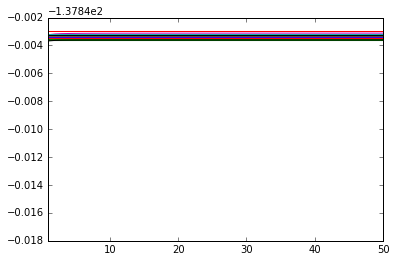

In [10]:

#import cPickle
#with open('results_cv_greed.pckl','rb') as inp:
#    bests = cPickle.load(inp)

for b in bests:
    history = []
    for i in xrange(0, len(b.history)):
        
        best_value = max([h[1] for h in b.history[:i+1]])
        
        history.append(best_value)
    plt.plot(history)
#plt.ylim((-100, -80))
plt.xlim((1,50))

import cPickle
with open('results_cv_greed.pckl','wb') as out:
    cPickle.dump(bests, out)


In [18]:
import theano.tensor as T
X = T.matrix()
result = []
models = []
predicts = []

for m in xrange(4):
    models.append(model_build(dataset_size=100))
    predict = models[m].predict_var(X)
    predicts.append(theano.function([X], predict))
for b in bests:
    scores = [b.history[i][1] for i in xrange(len(b.history))]
    best = np.argmax(scores)
    
    for m in xrange(4):
        #print b.history[best][2][m]
        models[m].params.set_value(b.history[best][2][m])
        result.append(np.mean((predicts[m](X_test)[:,0]-Y_test)**2))
        print result[-1]
    """
    bests.append( random_optimize(partial(cv_tc, k =4,  batch_size=75), model_build, optimizer, 50, 10, X_train, Y_train,  [alphas, lr] ,
     [alpha_ranges, lr_ranges], verbose=100))
    X = T.matrix()    
    model = model_build(dataset_size=100)
    
    
    """

print np.mean(result)
print np.std(result)

IndexError: tuple index out of range

In [ ]:
import theano.tensor as T

training_procedure = cv_tc( model_build,  optimizer, X_train, Y_train, k=4, validation_part=0.25,  batch_size=75 )
X = T.matrix()
result = []
import cPickle
with open('results_cv_greed.pckl','rb') as inp:
    bests = cPickle.load(inp)
for b in bests:
    for i in xrange(len(b.history)):
        training_procedure.models[0].respawn()
        
        alphas.set_value(b.history[i][0][0])
        lr.set_value(0.01)
        
    
        for _ in xrange(100):
            training_procedure.do_train()
        print i, training_procedure.do_validation()
        b.history[i] = [b.history[i][0], training_procedure.do_validation()]
    """
    bests.append( random_optimize(partial(cv_tc, k =4,  batch_size=75), model_build, optimizer, 50, 10, X_train, Y_train,  [alphas, lr] ,
     [alpha_ranges, lr_ranges], verbose=100))
    X = T.matrix()    
    model = model_build(dataset_size=100)
    
    
    """
#print np.mean(result)
#print np.std(result)
import cPickle
with open('results_cv_greed.pckl','wb') as out:
    cPickle.dump(bests, out)

0 -277.354348224
1 -98.4318368329
2 -91.477556289
3 -88.7876358911
4 -87.3681195013
5 -86.4958131954
6 -85.9080974466
7 -85.4867262579
8 -85.1706877608
9 -84.9253654044
10 -84.7296882281
11 -84.5701150257
12 -84.4375590689
13 -84.325703782
14 -84.2300274167
15 -84.1472117145
16 -84.0747692598
17 -84.0108007805
18 -83.9538325222
19 -83.9027045381
20 -83.8564922596
21 -83.8144503541
22 -83.7759718349
23 -83.7405578124
24 -83.7077947995
25 -83.6773374657
26 -83.6488953789
27 -83.6222227017
28 -83.5971101057
29 -83.5733783685
30 -83.5508732602
31 -83.5294614276
32 -83.509027058
33 -83.4894691554
34 -83.4706993042
35 -83.4526398205
36 -83.4352222164
37 -83.4183859174
38 -83.4020771852
39 -83.3862482101
40 -83.3708563417
41 -83.3558634344
42 -83.3412352887
43 -83.3269411723
44 -83.3129534081
45 -83.2992470184
46 -83.2857994166
47 -83.2725901402
48 -83.2596006171
49 -83.2468139621
50 -83.2342147983
0 -82.9183322045
1 -82.2689872595
2 -81.7980326558
3 -81.4416729982
4 -81.1631230056
5 -80.9397

In [49]:
best_values = []
for b in bests:
    history = []
    for i in xrange(0, len(b.history)):
        
        best_value = max([h[1] for h in b.history[:i+1]])
        
        history.append(best_value)
        if np.isnan(history[-1]):
            continue
        best_values.append(history[-1])
print np.mean(best_values)

-110.484273818


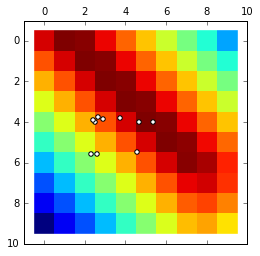

In [16]:
plt.matshow(matrix)
for i in bests:
    i = i.best_values[0]
    i = np.log10(np.exp(i)**2)
    if i[0]>10 or i[1] >10:
        continue
    
    plt.scatter(i[0]+np.random.randn(1)*0.1,i[1]+np.random.randn(1)*0.1, c='w')

In [11]:
for i in bests:
    print np.array(i.best_values[0])**2

[  1.00000000e+05   1.00000000e+00]
[ 100.  100.]
[ 100.  100.]
[   1.  100.]
[  1.  10.]


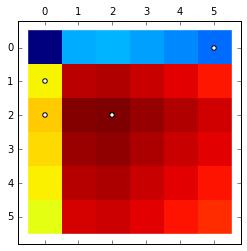

In [12]:
plt.matshow(matrix)
for i in bests:
    i = i.best_values[0]**2
    i = np.log10(i)
    
    plt.scatter(i[0],i[1], c='w')